# Regressão Logística

## Introdução
Um problema de classificação é quando queremos categorizar alguma variável por classes. Nesse caso, a varável $\pmb{y}$ que queremos prever é discreta. Um exemplo seria saber se uma pessoa ganha mais de R$ 50000 anuais, com base nas suas informações socioeconômicas, ou saber se uma pessoa pedindo crédito em um banco vai pagar o que deverá corretamente.

Como exemplo ilustrativo, vamos supor que somos uma agência de seguros e estamos decidindo se devemos ou não segurar o carro, com base nas informações sociais dos seus donos. Por motivos de simplicidade, vamos dizer que a probabilidade da pessoa bater o carro só dependa do tempo que ela gastou na autoescola; nós temos acesso à esse tempo, mas não sabemos exatamente como ele se relaciona com a probabilidade da pessoas segurada sofrer um acidente automobilístico.

Nós então olhamos no nosso arquivo o caso de 15 pessoas, onde temos tanto os dados de tempo na autoescola e se elas sofreram ou não acidente. Se nós colocarmos nossos dados em um gráfico (x, y) ele seria mais ou menos da seguinte forma:

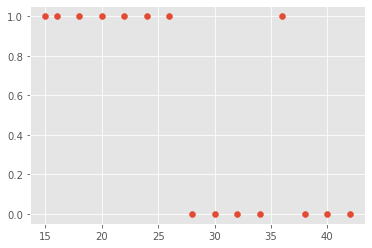

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from matplotlib import pyplot as plt, style
from IPython import display

style.use('ggplot')
np.random.seed(2)

x = np.linspace(15,42,15).astype(int)
y_logit = x*-0.5 + 15 + np.random.normal(0,1.5, x.shape)
y = np.round(np.exp(y_logit) / (np.exp(y_logit) + 1), 0)

plt.scatter(x, y)
plt.show()

Nós podemos ver então que a maioria das pessoas que sofreram um acidente de carro passaram pouco tempo na autoescola. Mas nós queremos mais do que isso. Queremos algum modelo capaz de prever a probabilidade da pessoa sofrer um acidente com base no tempo que durou a autoescola dela.

Uma forma ingênua de resolver esse problema seria utilizar regressão linear. Para tomar uma decisão de segurar ou não o carro, poderíamos então um limiar: só iremos segurar pessoas cuja previsão de acidente for menos de 0.5. A linha que melhor se ajusta aos dados seria então mais ou menos assim:

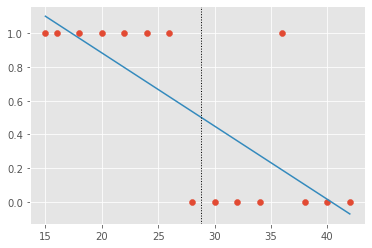

In [2]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
line = regr.predict(x.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x, line, c='C1')
plt.axvline(x=(0.5 - regr.intercept_)/regr.coef_, c='k', ls='dotted', lw=1)
plt.show()


Nesse caso, utilizar regressão linear e estabelecer um limiar funcionaria muito bem! Se colocássemos o nosso limiar em 0.5, preveríamos que todos à direita da curva pontilhada não sofreriam um acidente e erraríamos em apenas dois casos. 

No entanto, suponha agora que nos nossos dados haja uma pessoa com muitas horas de autoescola. Digamos, umas 100 horas. Essa pessoa não sofreu nenhum acidente e de certa forma ter ela nos dados não traz muita informação nova: ela foi tão treinada que dificilmente preveríamos que sofreria um acidente.

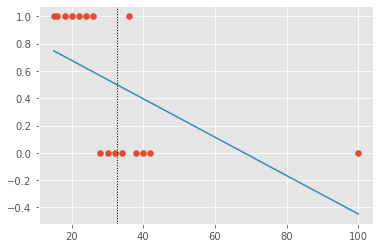

In [5]:
x_ = np.array([[100]])
y_ =  x_*-0.5 + 15 + np.random.normal(0,1.5, 1)
y_ = np.round(np.exp(y_) / (np.exp(y_) + 1), 0)

x = np.append(x, x_)
y = np.append(y, y_)

regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
line = regr.predict(x.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x, line, c='C1')
plt.axvline(x=(0.5 - regr.intercept_)/regr.coef_, c='k', ls='dotted', lw=1)
plt.show()

No entanto, essa pessoa super treinada faz com que nossa linha de regressão seja puxada para a direita, fazendo com que classifiquemos muitas das pessoas de baixo risco como tendo alta probabilidade de sofrerem acidentes. Podemos ver mais um comportamento estranho com o algoritmo de regressão linear: para pessoas com mais de 70 horas de autoescola, ele está prevendo uma probabilidade negativa de acidente, o que simplesmente não tem sentido.

Para resolver isso, em vez de utilizar regressão linear, vamos utilizar a regressão logística sempre que nos depararmos com problemas de classificação. Regressão logística nos fornecerá uma previsão sempre entre 0 e 1, de forma que possamos interpretar seus resultados como uma probabilidade válida. Além disso, regressão logística não será influenciada por outliers que não fornecem muita informação nova, pois a atenção do algoritmo será concentrada na região de fronteira.

A intuição por trás de regressão logística é bastante simples: em vez de acharmos a reta que melhor se ajusta aos dados, vamos achar uma curva em formato de 'S' que melhor se ajusta aos dados:

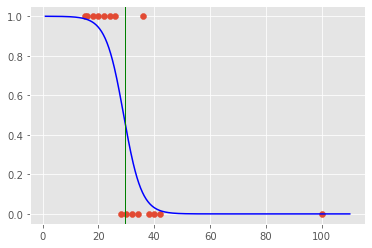

Acurácia: 0.875
Os parâmetros do modelos são: 9.068, -0.312


In [14]:
from sklearn.linear_model import LogisticRegression

'''
Cfloat, default=1.0
Inverso da força de regularização; deve ser uma flutuação positiva. 
Como nas máquinas de vetores de suporte, valores menores especificam uma regularização mais forte.
'''

clf = LogisticRegression(C=1e7)
clf.fit(x.reshape(-1,1), y)

# função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))

line = np.linspace(1, 110, 500)

line = model(line * clf.coef_ + clf.intercept_).ravel() #Matriz achatada com o mesmo tipo da matriz de Entrada

#lw é a espessura da linha
plt.scatter(x, y)
plt.plot(np.linspace(1, 110, 500), line, c='b') #cor blue
plt.axvline(x=0.5 - (clf.intercept_/clf.coef_), c='g', lw=1) #cor green
plt.show()

print('Acurácia: %.3f' % clf.score(x.reshape(-1,1), y))
print('Os parâmetros do modelos são: %.3f, %.3f' % (clf.intercept_, clf.coef_))


# Justificativa matemática

Para implementar regressão logística, precisamos de apenas duas modificações ao algoritmo de regressão linear. Em primeiro lugar, precisamos utilizar uma função achatamento após a transformação linear, de forma que o valor previsto pelo modelo possa ser interpretado como uma probabilidade (lembre que estamos tentando modelar uma variável binária, então queremos saber a probabilidade dela ser 0 ou 1). A função de achatamento que vamos utilizar é a função logística, ou sigmoide:
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

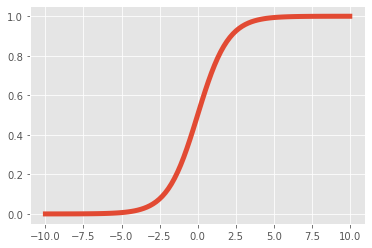

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
#    return 1/(1 + 2.718281828459045**(-x))

#lw é a espessura da linha
plt.plot(np.linspace(-10,10,100), sigmoid(np.linspace(-10,10,100)), lw=5)
plt.show()

O que a função sigmoide faz é simplesmente converter o score produzido pela transformação linear $\pmb{X}\pmb{\hat{w}}$ em uma probabilidade, de forma que quanto maior o score, maior a probabilidade prevista e vice versa. Agora, podemos utilizar 0.5 como um limiar, da mesma forma que havíamos feito com a nossa solução ingênua utilizando regressão linear. A vantagem agora é que, além da previsão ser uma probabilidade válida, a regressão logística não é sensível ao pontos com scores muito altos ou muito baixos. 

Lembre-se de como com regressão linear tínhamos um modelo na forma $\pmb{y}=\pmb{X}\pmb{w} + \pmb{\epsilon}$, de forma que nossas previsões eram da forma $\pmb{\hat{y}}=\pmb{X}\pmb{\hat{w}}$. Agora, com regressão logística, nosso modelo fica:

$$\pmb{y}=\sigma(\pmb{X}\pmb{w} + \pmb{\epsilon})$$

De forma que nossas previsões serão uma probabilidade resultado de $\pmb{\hat{y}}=\sigma(\pmb{X}\pmb{\hat{w}})$. Novamente, nosso objetivo será aprender os parâmetros $\pmb{\hat{w}}$ de forma a minimizar uma função custo. 

A segunda modificação que devemos fazer no algoritmo de regressão linear é alterar a função custo. Agora, em vez de tentarmos minimizar a distância entre o valor previsto e o observado, nós vamos minimizar a [**entropia cruzada**](https://pt.wikipedia.org/wiki/Entropia_cruzada) :

$$L=\begin{cases} 
-log(\hat{y}) & se \space y=1\\
-log(1-\hat{y}) & se \space y=0\\
\end{cases}$$

Na teoria da informação, a entropia cruzada se refere à diferença entre duas distribuições de probabilidade $p$ (verdadeira) e $q$ (estimada) sobre o mesmo conjunto de eventos. Na prática, a entropia cruzada mede o número médio de bits necessários para identificar um evento , se a codificação utilizada for otimizada para a distribuição de probabilidade estimada $q$, em vez de otimizado para a distribuição de probabilidade verdadeira $p$. A entropia cruzada pode ser usada para definir uma função de perda no aprendizado de máquina e otimização . A verdadeira probabilidade $p_i$ é o rótulo verdadeiro e a distribuição fornecida $q_i$ é o valor previsto do modelo atual.

A entropia cruzada da distribuição $q$ em relação a uma distribuição $p$ sobre um determinado conjunto.

Para distribuições de probabilidade discretas $p$ e $q$ com o mesmo suporte $\mathcal {X}$, isso significa queː

$$H(p,q)=-\sum_{x \in \mathcal {X}} p(x) log(q(x))$$

Mais especificamente, considere a regressão logística, que (entre outras coisas) pode ser usada para classificar observações em duas classes possíveis (geralmente simplesmente rotuladas 0 e 1 A saída do modelo para uma observação, dado um vetor de entrada $x$ , pode ser interpretado como uma probabilidade, que serve como base para classificar a observação. A probabilidade é modelada usando a função logística $g(z)=1/(1+e^{-z})$. Onde $z$ é alguma função do vetor de entrada $x$, geralmente apenas uma função linear. 

Para entender essa função custo, vamos analisar cada caso separadamente. Se $y=1$ e $\hat{y}=1$, $-log(\hat{y})=0$. No entanto, quanto mais $\hat{y}$ se aproxima de 0, $-log(\hat{y})$ cresce exponencialmente para o infinito. Por outro lado, se $y=0$ e $\hat{y}=0$, podemos ver que $-log(1-\hat{y})=0$. Mas $-log(1-\hat{y})=0$ vai para o infinito conforme $\hat{y}$ se distancia de $0$. 

A probabilidade de saída $y=1$ é dado por:

$q_{y=1} = \hat{y} = g(w,x) = \frac{1}{(1+e ^{-x*w})}$

onde o vetor de pesos $w$ é otimizado através de algum algoritmo apropriado, como descida de gradiente. Da mesma forma, a probabilidade complementar de encontrar a saída $y=0$ é simplesmente dado por

$q_{y=0} = 1- \hat{y} = 1 -  \frac{1}{(1+e ^{-x*w})}$

Tendo criado nossa notação, $p \in \{y, 1-y\}$ e $q \in \{\hat{y}, 1-\hat{y}\}$, podemos usar entropia cruzada para obter uma medida de dissimilaridade entre $p$ e $q$ :

Para $p=y$ e $q=\hat{y}$ um termo fica $y log(\hat{y})$

Para $p=(1-y)$ e $q=(1-\hat{y})$ um termo fica $(1-y)log(1-\hat{y})$


$$H(p,q) = - \sum_{i} p_i log(q_i) = - \sum y log (\hat{y}) + (1-y)log(1-\hat{y}) = \sum - y log (\hat{y}) - (1-y)log(1-\hat{y})$$


Nós podemos resumir a função custo de entropia cruzada da seguinte forma:

$$L=\sum -y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

Nós podemos então substituir $\hat{y}$ por $\sigma(\pmb{X}\pmb{w})$ e diferenciar $L$ com respeito aos parâmetros:

$$\frac{\partial L}{\partial w_j}=\sum \Big(\frac{y}{\sigma(\pmb{x}_i \pmb{w})} - \frac{(1-y)}{1-\sigma(\pmb{x}_i \pmb{w})} \Big) \frac{\partial\sigma(\pmb{x}_i \pmb{w})}{\partial \pmb{w}}$$

Como é bastante entediante e desnecessário realizar o passo à passo dessa derivada, vamos pular direto par o resultado, que é incrivelmente simples:

$$\frac{\partial L}{\partial w_j}=\sum x_i(\sigma(\pmb{x}_i \pmb{w}) - y)=\sum x_i(\hat{y} - y)$$

E terminamos. Já temos toda a informação necessária para implementar uma regressão logística: bastará atualizar os parâmetros $\pmb{\hat{w}}$ iterativamente com gradiente descendente por exemplo.

## Implementação
Nossa implementação de regressão logística será extremamente similar à de regressão linear com gradiente descendente. A única modificação será na atualização do gradiente, que utilizara as derivadas computadas acima.

In [20]:
# Implementação própria
class logistic_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=100):
        self.learning_rate = learning_rate # taxa de aprendizado
        self.training_iters = training_iters # iterações de treino
    
    def _logistic(self, X):
        '''Função logística'''
        return  1 / (1 + np.exp(-np.dot(X, self.w_hat)))    
    
    def fit(self, X_train, y_train):
        
        # formata os dados
        X = X_train.reshape(-1,1) if len(X_train.shape) < 2 else X_train
        X = np.insert(X, 0, 1, 1)
               
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,1, size = X[0].shape)

        # loop de treinamento
        for _ in range(self.training_iters):
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
        
            # atualiza o gradiente com informação de todos os pontos
            for var in range(len(gradient)):
                gradient[var] += np.dot(X[:,var], (self._logistic(X) - y_train))

            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado

            # atualiza os parâmetros
            self.w_hat -= gradient

        self.coef_= self.w_hat[1:]
        self.intercept_ = self.w_hat[:1]
    def predict(self, X_test):
        
        # formata os dados
        if len(X_test.shape) < 2:
            X = X_test.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # aplica função logística
        logit = self._logistic(X) 
        
        # aplica limiar
        return np.greater_equal(logit, 0.5).astype(int)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, mean_absolute_error, mean_squared_error

regr = logistic_regr(learning_rate=0.001, training_iters=90000)
regr.fit(x, y)
y_hat = regr.predict(x)
print('Acurácia: ', np.mean(np.equal(y_hat, y)))
print('Os parâmetros do modelos são: %.3f, %.3f' % (regr.w_hat[0], regr.w_hat[1]))
print('relatório', classification_report(y, y_hat))
print('matriz de confusão\n', confusion_matrix(y, y_hat))
print('MAE:', mean_absolute_error(y, y_hat)) # valor discreto 1 ou 0
print('MSE:', mean_squared_error(y, y_hat))
print('RMSE:', np.sqrt(mean_squared_error(y, y_hat)))

print("\n\n\nBiblioteca de mercado sklearn")

# sklearn
clf = LogisticRegression(C=1e7)
clf.fit(x.reshape(-1,1), y)
predicoes = clf.predict(x.reshape(-1,1))
print('Acurácia da biblioteca LogisticRegression do SKLearn : ', np.mean(np.equal(predicoes, y)))
print('relatório', classification_report(y, predicoes))
print('matriz de confusão\n', confusion_matrix(y, predicoes))
print('MAE Mean absolute error:', mean_absolute_error(y, predicoes))
print('MSE Mean Squared Error:', mean_squared_error(y, predicoes))
print('RMSE Root Mean Square Error:', np.sqrt(mean_squared_error(y, predicoes)))


Acurácia:  0.875
Os parâmetros do modelos são: 9.036, -0.311
relatório               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16

matriz de confusão
 [[7 1]
 [1 7]]
MAE: 0.125
MSE: 0.125
RMSE: 0.3535533905932738



Biblioteca de mercado sklearn
Acurácia da biblioteca LogisticRegression do SKLearn :  0.875
relatório               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16

matriz de confusão
 [[7 1]
 [1 7]]
MAE Mean absolute error: 0.125
MSE Mean Squared Error

Nós podemos ver que a nossa implementação aprendeu parâmetros muito similares aos obtidos acima com uma regressão logística de mercado. Além disso, nosso modelo também tem uma acurácia de 86,66%, o que mostra que provavelmente não erramos nada. No entanto, nossa implementação é bem mais lenta do que a de mercado.

Para melhorar isso, poderíamos implementar alguma melhoria no algoritmo de otimização,como utilizar GDE com momento. Como isso seria demasiadamente preditivo, vamos parar por aqui. Afinal, na prática, basta utilizar um algoritmo de regressão logística pronto que não precisaremos nos preocupar com esses detalhes.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
print("\n\nImplementação própria")
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.5, 
                                                    random_state=1)

regr = logistic_regr(learning_rate=0.001, training_iters=100)
regr.fit(X_train, y_train)
predicoes_y_hat = regr.predict(X_test)
print('relatório', classification_report(y_test, predicoes_y_hat))
print('regr.coef_',regr.coef_, 'regr.intercept_',regr.intercept_)

outside = ['REAL', 'REAL']
inside = ['P','N']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index.names = ['', 'REAL']
matriz_confusao = pd.DataFrame(data=confusion_matrix(y, y_hat), index=hier_index,  columns=['Predição P', 'Predição N'])
print('matriz de confusão\n', matriz_confusao)

print('MAE:', metrics.mean_absolute_error(y_test, predicoes_y_hat))
print('MSE:', metrics.mean_squared_error(y_test, predicoes_y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicoes_y_hat)))

print("\n\n\nBiblioteca de mercado sklearn")
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), 
                                                    y, test_size=0.5, 
                                                    random_state=101)
clf = LogisticRegression(max_iter=101)
clf.fit(X_train, y_train)
predicoes = clf.predict(X_test)
print('clf.coef_',clf.coef_, 'clf.intercept_', clf.intercept_)
print('relatório', classification_report(y_test, predicoes))

matriz_confusao = pd.DataFrame(data=confusion_matrix(y_test, predicoes), columns=['Predição P', 'Predição N'])
index='P N'.split()
matriz_confusao['REAL']=index
matriz_confusao.set_index('REAL', inplace=True)
print('matriz de confusão\n', matriz_confusao)

print('MAE Mean absolute error:', metrics.mean_absolute_error(y_test, predicoes))
print('MSE Mean Squared Error:', metrics.mean_squared_error(y_test, predicoes))
print('RMSE Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predicoes)))



Implementação própria
relatório               precision    recall  f1-score   support

         0.0       0.38      1.00      0.55         3
         1.0       0.00      0.00      0.00         5

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8

regr.coef_ [-0.03087453] regr.intercept_ [-0.76452809]
matriz de confusão
            Predição P  Predição N
     REAL                        
REAL P              7           1
     N              1           7
MAE: 0.625
MSE: 0.625
RMSE: 0.7905694150420949



Biblioteca de mercado sklearn
clf.coef_ [[-0.1561991]] clf.intercept_ [4.6100242]
relatório               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg  